In [1]:
import opendatasets as od
import pandas as pd
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
od.download("https://www.kaggle.com/datasets/yasserh/housing-prices-dataset")

Skipping, found downloaded files in ".\housing-prices-dataset" (use force=True to force download)


In [3]:
File = pd.read_csv('housing-prices-dataset/Housing.csv')

In [4]:
File.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
File.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
File.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
yes_no_list =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [8]:
def binary_map(x):
    return x.map({'yes': 1, "no": 0})
def FurnishStatus(x):
    return x.map({'furnished':1,'semi-furnished':0})

In [9]:
File[yes_no_list] = File[yes_no_list].apply(binary_map)

In [10]:
Furnish = ['furnishingstatus']

In [11]:
File[Furnish] = File[Furnish].apply(FurnishStatus)

In [19]:
File

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,NaN
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0.0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,NaN
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1.0


In [13]:
df = File.copy()

In [24]:
df = df.dropna()

In [25]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,2380000,2475,3,1,2,1,0,0,0,0,0,0,1.0
523,2380000,2787,4,2,2,1,0,0,0,0,0,0,1.0
527,2275000,1836,2,1,1,0,0,1,0,0,0,0,0.0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0.0


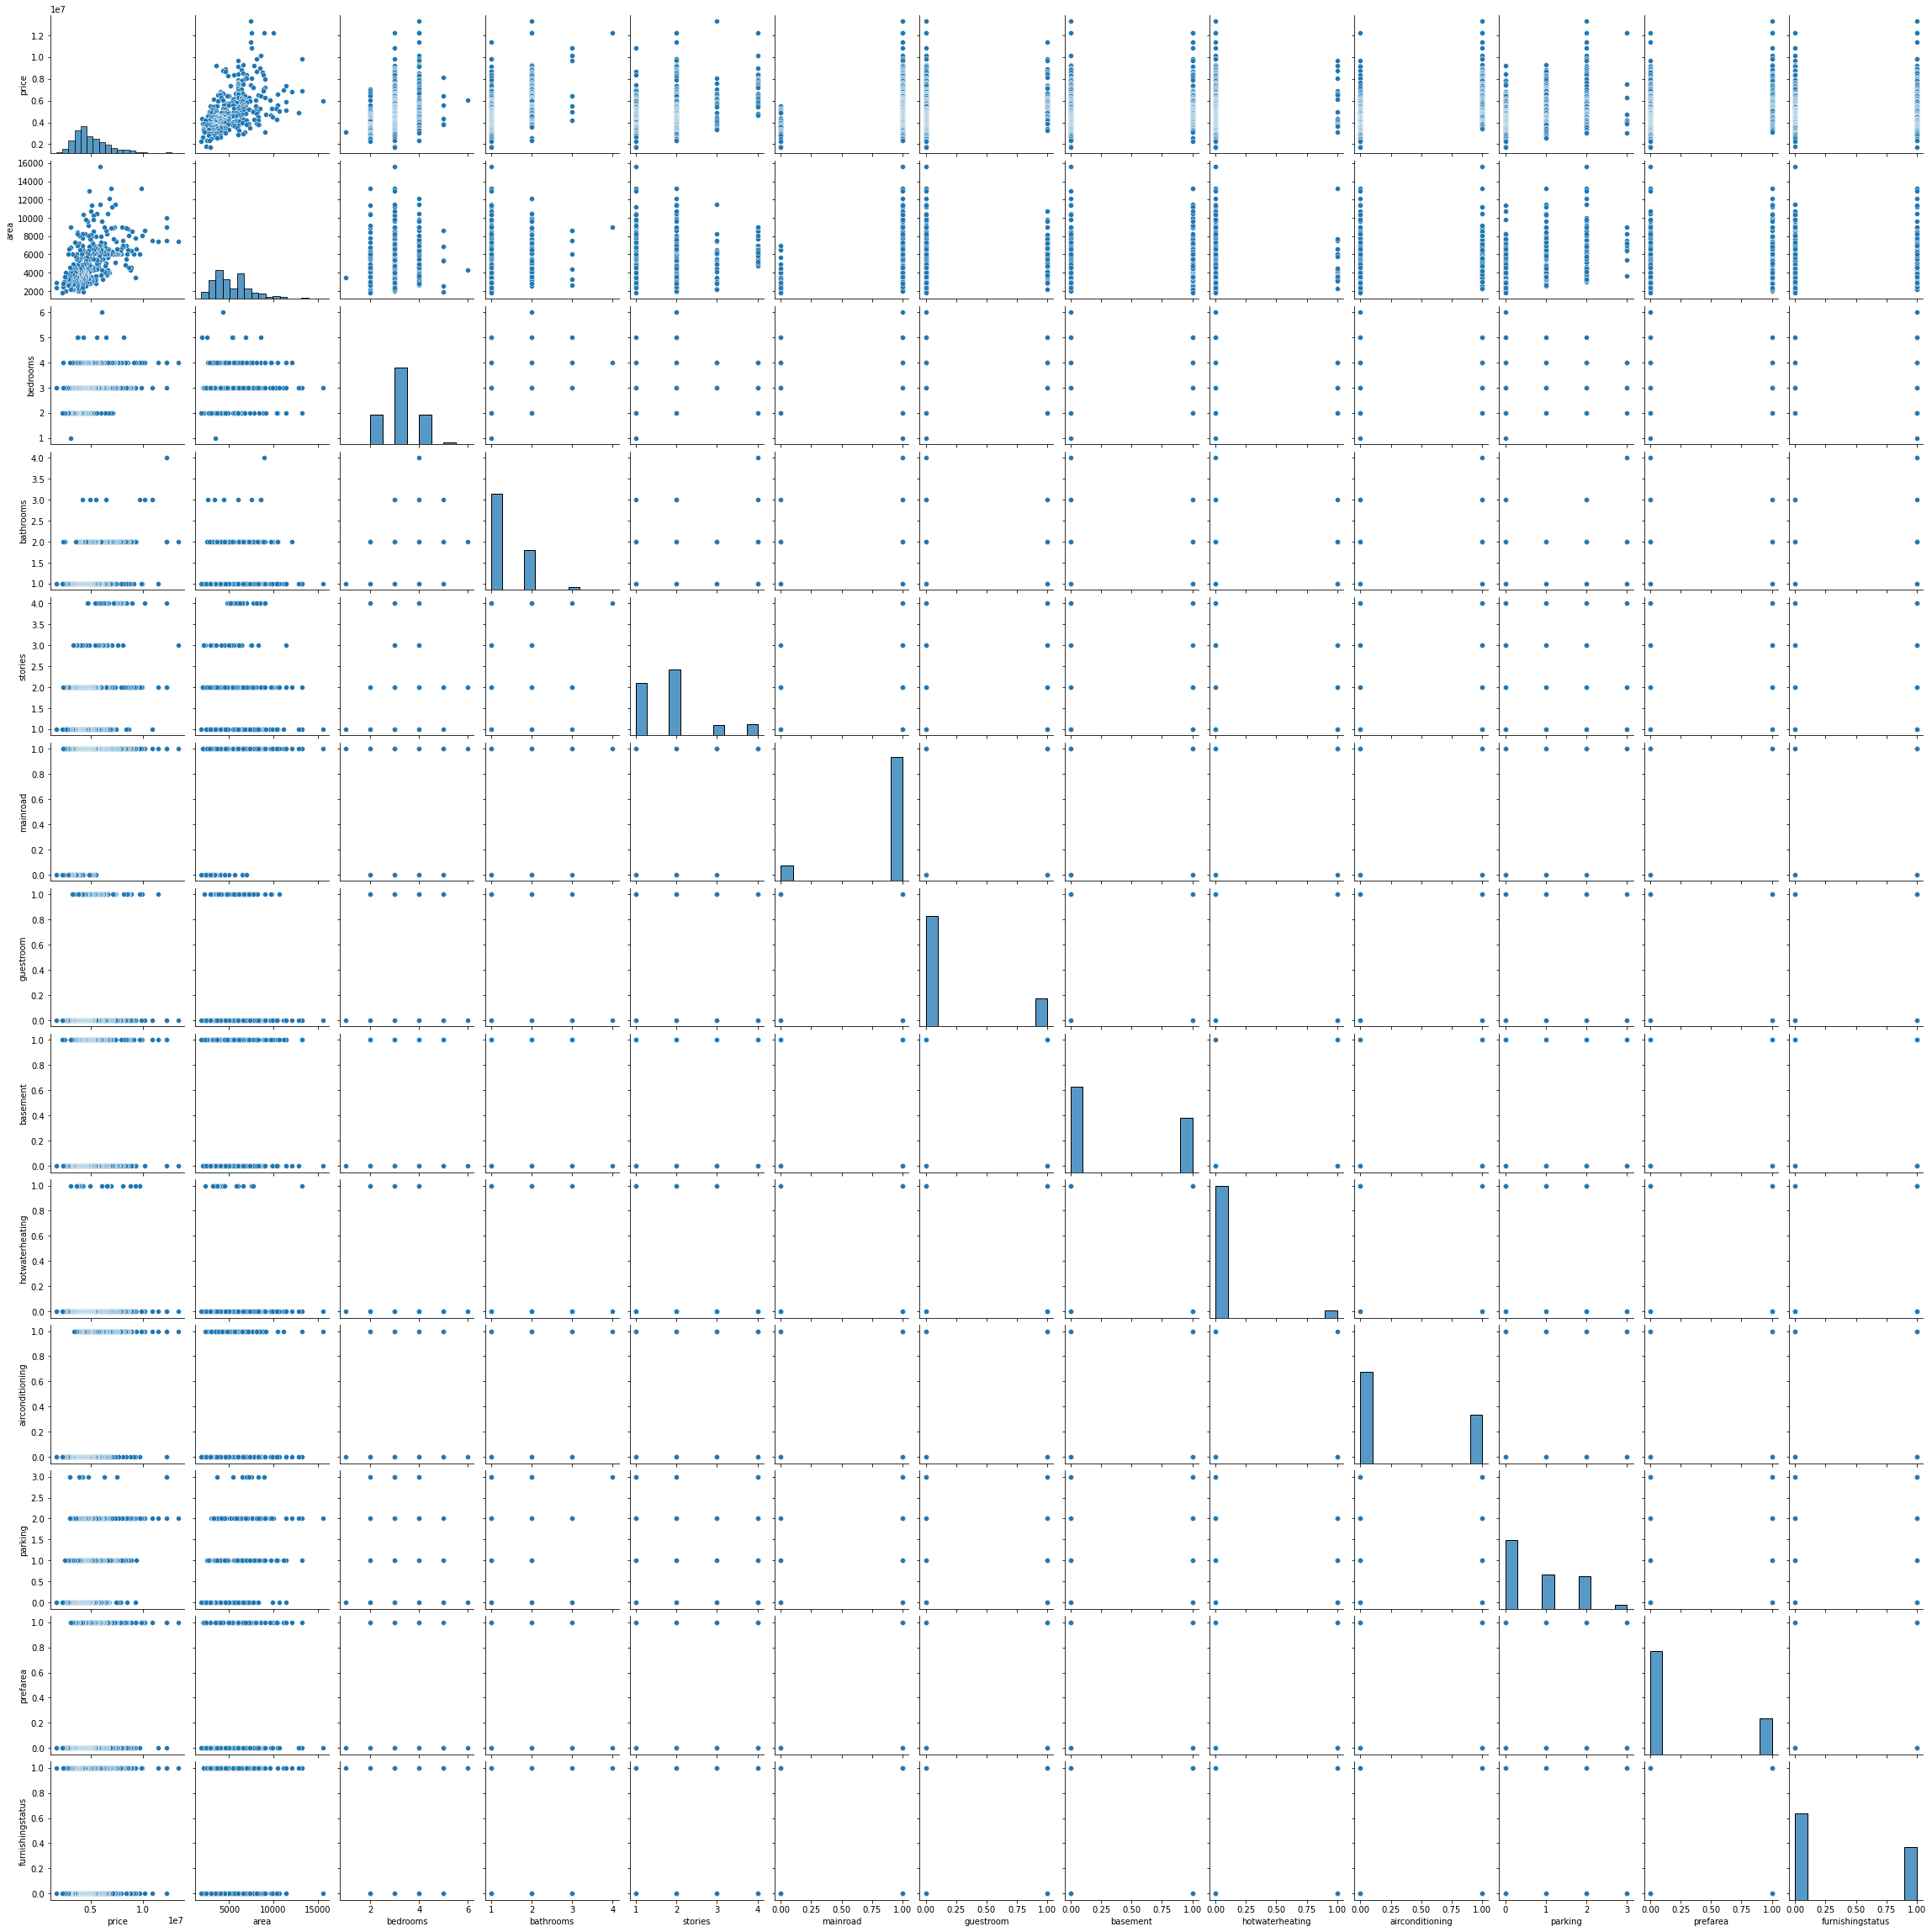

In [74]:
sns.pairplot(df)

<AxesSubplot:>

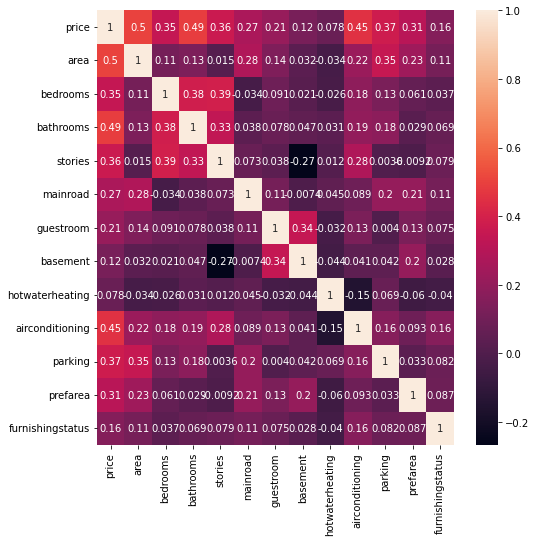

In [78]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(),ax=ax,annot = True)

In [ ]:
sns.histplot(df)

In [26]:
X = df.drop(['price'], axis=1)
y = df['price']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [63]:
model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)

In [64]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
area,248.193850
bedrooms,182198.206625
bathrooms,915614.756421
stories,454098.419796
mainroad,449968.240392
guestroom,180069.426342
basement,410387.834726
hotwaterheating,766785.733565
airconditioning,761512.703077
parking,325390.021807


In [65]:
predictions = model.predict(X_test)

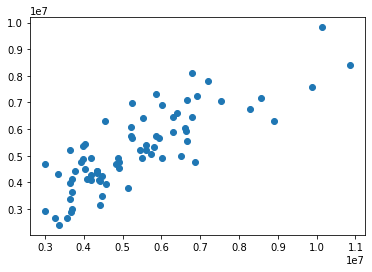

In [66]:
plt.scatter(y_test,predictions)

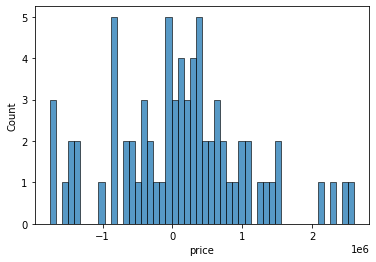

In [67]:
sns.histplot((y_test-predictions),bins=50);

In [68]:
from sklearn import metrics

In [69]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 746389.7499578667
MSE: 936138282323.8206
RMSE: 967542.393037029


In [70]:
accuracy = model.score(X_test, y_test)

In [71]:
print(accuracy)

0.6679810382246392
